In [ ]:
import pandas as pd
import numpy as np  
from sklearn.cluster import KMeans
from fcmeans import FCM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("/content/student-mat-pass-or-fail.csv")     
data.shape      #Size of data

(395, 30)

In [ ]:
data.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1
5,1,0,16,1,1,1,4,3,1,2,...,4,2,1,2,5,10,15,15,15,1
6,1,0,16,1,1,1,2,2,1,2,...,4,4,1,1,3,0,12,12,11,1
7,1,1,17,1,0,0,4,4,2,2,...,1,4,1,1,1,6,6,5,6,0
8,1,0,15,1,1,0,3,2,1,2,...,2,2,1,1,1,0,16,18,19,1
9,1,0,15,1,0,1,3,4,1,2,...,5,1,1,1,5,0,14,15,15,1


In [ ]:
X = data.iloc[:, [ 0,1, 2, 3, 4, 6, 7, 8, 9]].values
Y = data.iloc[:, 5].values
X
Y


array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=10) 
kmeans.fit(X)
labels = kmeans.labels_
True_labels = sum(Y == labels)
accuracy=True_labels/float(Y.size)*100
print("Accuracy is :",accuracy)


Accuracy is : 50.63291139240506


In [ ]:
labels=pd.DataFrame(labels)
labels
labels.columns=["labels"]
labels
labels.value_counts()

labels
0         204
1         191
dtype: int64

In [ ]:
C_Means=FCM(n_clusters=3,random_state=25,max_iter=100,m=1.5)
C_Means.fit(X)
pred_C_Means = C_Means.soft_predict(X)      
pred_C_Means

array([[0.57237946, 0.08776293, 0.33985761],
       [0.02725564, 0.76403638, 0.20870798],
       [0.06409844, 0.85654813, 0.07935343],
       ...,
       [0.10380629, 0.22776857, 0.66842513],
       [0.13548845, 0.23091953, 0.63359202],
       [0.06553686, 0.27298293, 0.66148021]])

In [ ]:
def alpha(alpha,fuzzy_values):
  labels=[]
  memberships=len(fuzzy_values)
  for i in range(memberships):
    if (alpha>=fuzzy_values[i][0]):
      labels.append(1)
    else:
      labels.append(0)
  return labels

In [ ]:
predictied=alpha(.8,pred_C_Means)

correct_labels = sum(Y== predictied)
C_Means_accuracy=correct_labels/float(Y.size)*100
print("Accuracy_score :",C_Means_accuracy)


Accuracy_score : 77.46835443037975


In [ ]:
n=alpha(.5,pred_C_Means)
n
n=pd.DataFrame(n)
n
n.columns=["labels"]
n
n.value_counts()

labels
1         263
0         132
dtype: int64

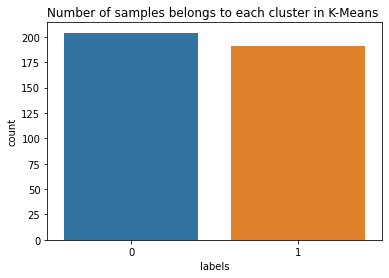

In [ ]:
import seaborn as sns 
sns.countplot(data=labels,x="labels").set(title='Number of samples belongs to each cluster in K-Means ')
plt.show()

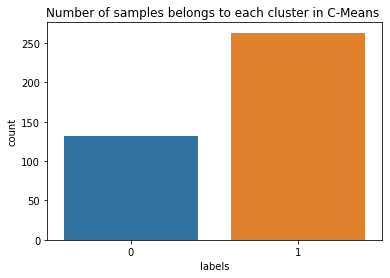

In [ ]:
import seaborn as sns 
sns.countplot(data=n,x="labels").set(title='Number of samples belongs to each cluster in C-Means ')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25, random_state=49)


In [ ]:
svc = SVC(random_state=47, kernel='linear')  
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
SVM_accuracy=accuracy_score(y_test, y_predict)*100
print("Accuracy score : ",SVM_accuracy)

Accuracy score :  88.88888888888889
